#### Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#### Reading the data

In [2]:
Data = pd.read_csv('MultipleLR.csv',header = None)
Data.head()

,0,1,2,3
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [3]:
# splitting the X and Y Data
X = Data.iloc[:,:-1].values
y = Data.iloc[:,-1].values.reshape(-1,1)

print("X Shape: ",X.shape)
print("The first 5 samples of X:\n",X[:5])
print("---------------------------")
print("y Shape: ",y.shape) 
print("The first 5 samples of y:\n",y[:5])

X Shape:  (25, 3)
The first 5 samples of X:
 [[ 73  80  75]
 [ 93  88  93]
 [ 89  91  90]
 [ 96  98 100]
 [ 73  66  70]]
---------------------------
y Shape:  (25, 1)
The first 5 samples of y:
 [[152]
 [185]
 [180]
 [196]
 [142]]


#### Initializing the parameters

In [4]:
m = len(X)
P = np.zeros((X.shape[1]+1,1))

In [5]:
# adding column of ones to X data
X = np.hstack([np.ones((m,1)),X])
print(X[:5])
print(X.shape)

[[  1.  73.  80.  75.]
 [  1.  93.  88.  93.]
 [  1.  89.  91.  90.]
 [  1.  96.  98. 100.]
 [  1.  73.  66.  70.]]
(25, 4)


#### Defining the required functions

In [6]:
# the hypothesis function
def Hypothesis(X_data,p):
    H = np.dot(X_data,p)
    return H
    
# defining the cost function
def Cost(X_data,y_data,p):
    cost = np.sum(((Hypothesis(X_data,p) - y_data)**2),axis = 0)/(2*m)
    return cost

In [7]:
# defining the optimization function
def RMSProp_Optimizer(X_data,y_data,p,learning_rate,Epochs,Batch_Size,threshold,Beta):
    # initializing the cost,parameters lists
    cost = []
    Parameters = []
    p = p.copy()
    # initializing the RMSProp with zero
    Vt = np.zeros((X_data.shape[1],1))
    # initializing the the number of iterations
    count = 0
    # epsilon for bias correction
    e = 1e-8
    print("Loss Befor Mini Batch Gradient Descent: ",Cost(X_data,y_data,p))
    # looping over the number of epochs
    for i in range(Epochs):
        # looping over the number of mini batches
        for j in range(int(np.ceil(m/Batch_Size))):
            # appending the parameters
            Parameters.append(p)
            # increasing the number of iterations
            count = count+1
            # this if condition excutes if the number of remaining samples in the data is greater than or equals the mini batch size
            if  len(X_data[j*Batch_Size :]) / Batch_Size >= 1:
                # calculating the prediction
                h = Hypothesis(X_data[j*Batch_Size : (j+1)*Batch_Size],p)
                # computing the cost
                c = Cost(X_data[j*Batch_Size : (j+1)*Batch_Size],y_data[j*Batch_Size : (j+1)*Batch_Size],p)
                # appending the cost
                cost.append(c[0])
                # calculating the gradient
                grad = (1/Batch_Size) * np.dot(X_data[j*Batch_Size : (j+1)*Batch_Size].T,(h - y_data[j*Batch_Size : (j+1)*Batch_Size]))
                # calculating RMSProp
                Vt = Beta*Vt + (1-Beta)*((grad)**2)
                # updating the parameters (thetas)
                p = p - (learning_rate*grad)/(np.sqrt(Vt) + e)
            # the else condition excutes if the number of remaining samples in the data is less than the mini batch size     
            else:
                # calculating the prediction
                h = Hypothesis(X_data[j*Batch_Size :],p)
                # computing the cost
                c = Cost(X_data[j*Batch_Size :],y_data[j*Batch_Size :],p)
                # appending the cost
                cost.append(c[0])
                # calculating the gradient
                grad = (1/Batch_Size) * np.dot(X_data[j*Batch_Size :].T,(h - y_data[j*Batch_Size :]))
                # calculating RMSProp
                Vt = Beta*Vt + (1-Beta)*((grad)**2)
                # updating the parameters (thetas)
                p = p - (learning_rate*grad)/(np.sqrt(Vt) + e)
            # these two if conditions excute if the norm of the gradients or the different between the last two losses become less than the specified threshold
            if (len(cost) > 1):
                if ((np.linalg.norm(grad) <= threshold) or (np.abs(cost[j] - cost[j-1]) <= threshold)):
                    break
                else:
                    continue

        if (len(cost) > 1):            
            if ((np.linalg.norm(grad) <= threshold) or (np.abs(cost[i] - cost[i-1]) <= threshold)):
                break
            else:
                continue 
    return Parameters,cost,count

#### Updating the parameters

In [8]:
# defining the hyperparameters
# you can choose the batch size you want, here we defined it by size of 25 (the full data size)
learning_rate = 0.01
Beta = 0.9
e = 1e-8
Batch_Size = 25
Epochs = 5000
threshold = 0.0001
# calling the optimizer function
P_list,Cost_list,count = RMSProp_Optimizer(X,y,P,learning_rate,Epochs,Batch_Size,threshold,Beta)
Loss = Cost(X,y,P_list[-1])
print("Loss After Mini Batch Gradient Descent: ",Loss)
print("No. of Iterations is: ",count)
print("Best Parameters: \n",P_list[-1])

Loss Befor Mini Batch Gradient Descent:  [13405.98]
Loss After Mini Batch Gradient Descent:  [3.7984048]
No. of Iterations is:  1685
Best Parameters: 
 [[-0.17003677]
 [ 0.39601232]
 [ 0.51311557]
 [ 1.09225663]]


#### Visualization of the losses vs thetas

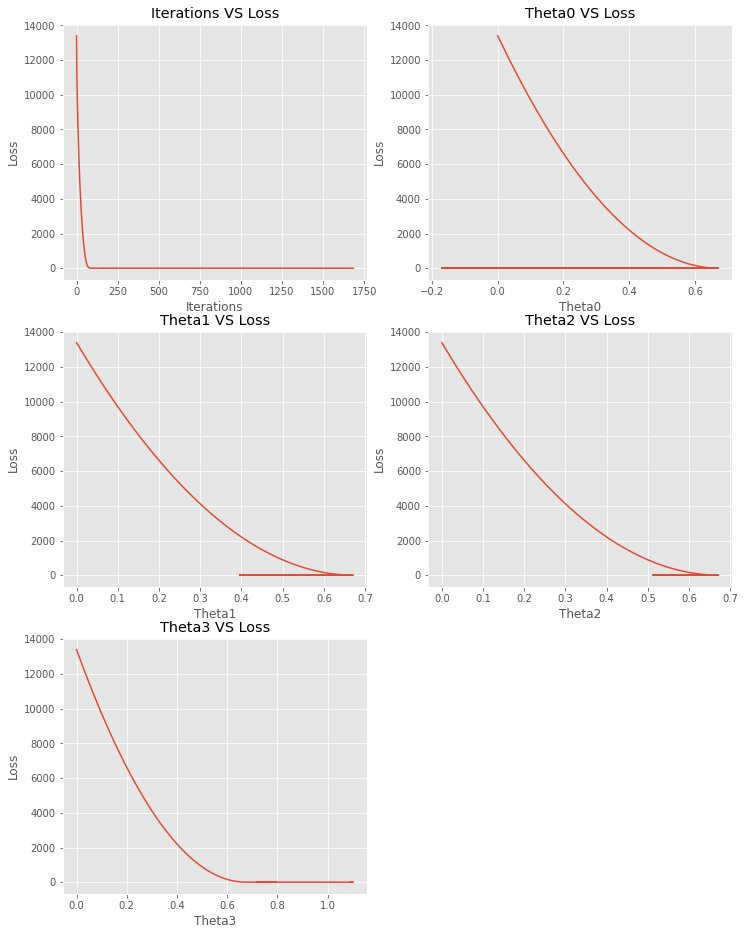

In [9]:
fig = plt.figure(figsize=(12,16))
ax1 = fig.add_subplot(321)
iters = list(range(count))
ax1.plot(iters,Cost_list)
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Loss")
ax1.set_title("Iterations VS Loss")


P_0 = [i[0] for i in P_list]
ax2 = fig.add_subplot(322)
ax2.plot(P_0,Cost_list)
ax2.set_xlabel("Theta0")
ax2.set_ylabel("Loss")
ax2.set_title("Theta0 VS Loss")


P_1 = [i[1] for i in P_list]
ax3 = fig.add_subplot(323)
ax3.plot(P_1,Cost_list)
ax3.set_xlabel("Theta1")
ax3.set_ylabel("Loss")
ax3.set_title("Theta1 VS Loss")

P_2 = [i[2] for i in P_list]
ax3 = fig.add_subplot(324)
ax3.plot(P_2,Cost_list)
ax3.set_xlabel("Theta2")
ax3.set_ylabel("Loss")
ax3.set_title("Theta2 VS Loss")

P_3 = [i[3] for i in P_list]
ax3 = fig.add_subplot(325)
ax3.plot(P_3,Cost_list)
ax3.set_xlabel("Theta3")
ax3.set_ylabel("Loss")
ax3.set_title("Theta3 VS Loss")
plt.show()

#### Losses updates with thetas

Text(0, 0.5, 'Loss')

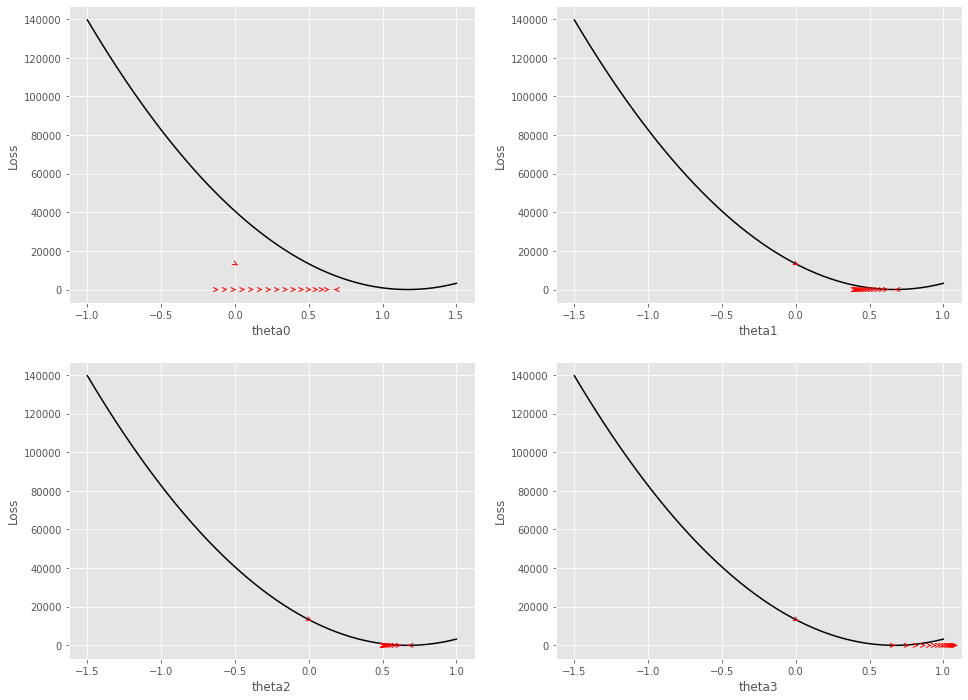

In [10]:
# defining the range of thetas
theta0_grid = np.linspace(-1,1.5,50).reshape(-1,1)
theta1_grid = np.linspace(-1.5,1,50).reshape(-1,1)
theta2_grid = np.linspace(-1.5,1,50).reshape(-1,1)
theta3_grid = np.linspace(-1.5,1,50).reshape(-1,1)
# concatenating the theta values
theta = np.vstack([theta0_grid,theta1_grid,theta2_grid,theta3_grid]).reshape(4,-1)
cost = Cost(X,y,theta).reshape(-1,1)
# initializing the the figure for plots
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(16,12))
ax[0][0].plot(theta0_grid, cost, 'k')
ax[0][1].plot(theta1_grid, cost, 'k')
ax[1][0].plot(theta2_grid, cost, 'k')
ax[1][1].plot(theta3_grid, cost, 'k')


# looping over the theta values updated by the model to plot them with the predefined theta 
for j in range(1,count,100):
    ax[0][0].annotate('', xy=(P_list[j][0][0], Cost_list[j]), xytext=(P_list[j-1][0][0], Cost_list[j-1]),arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},va='center', ha='center')
    ax[0][1].annotate('', xy=(P_list[j][1][0], Cost_list[j]), xytext=(P_list[j-1][1][0], Cost_list[j-1]),arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},va='center', ha='center')
    ax[1][0].annotate('', xy=(P_list[j][2][0], Cost_list[j]), xytext=(P_list[j-1][2][0], Cost_list[j-1]),arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},va='center', ha='center')
    ax[1][1].annotate('', xy=(P_list[j][3][0], Cost_list[j]), xytext=(P_list[j-1][3][0], Cost_list[j-1]),arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},va='center', ha='center')


ax[0][0].set_xlabel("theta0")
ax[0][1].set_xlabel("theta1")
ax[1][0].set_xlabel("theta2")
ax[1][1].set_xlabel("theta3")
ax[0][0].set_ylabel("Loss")
ax[0][1].set_ylabel("Loss")
ax[1][0].set_ylabel("Loss")
ax[1][1].set_ylabel("Loss")

#### Predicting values with the best theta 

In [13]:
# defining the predict function
def predict(x,p):
    y_pred = np.dot(X,p)
    return y_pred

# predicting with the best values of thetas
best_param = P_list[-1]
y_pred = predict(X,best_param)

print("Predicted Values: \n",y_pred[:5])
print("True Values: \n",y[:5])

Predicted Values: 
 [[151.70735478]
 [183.39314493]
 [180.07167249]
 [197.35813395]
 [139.06245369]]
True Values: 
 [[152]
 [185]
 [180]
 [196]
 [142]]


#### Computing the score

In [14]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.9863120153300114